In [7]:
import numpy as np
example = np.load('lab1_example.npz', allow_pickle=True)['example'].item()
example.keys()

dict_keys(['samples', 'samplingrate', 'frames', 'preemph', 'windowed', 'spec', 'mspec', 'mfcc', 'lmfcc'])

In [46]:
example["spec"].shape

(91, 512)

In [13]:
data = np.load('lab1_data.npz', allow_pickle=True)['data']
data.shape

(44,)

In [16]:
data_item = data[0]
data_item.keys()

dict_keys(['filename', 'samplingrate', 'gender', 'speaker', 'digit', 'repetition', 'samples'])

In [ ]:

example["samples"].shape


(18432,)

In [43]:
import matplotlib.pyplot as plt

def plot_comparison(example_, function_, title1="from example", title2="from function", figsize=(12, 8)):
    
    plt.figure(figsize=figsize)
    plt.subplot(2, 1, 1)
    plt.pcolormesh(example_, shading="auto")
    plt.title(title1)
    plt.subplot(2, 1, 2)
    plt.pcolormesh(function_, shading="auto")
    plt.title(title2)
    plt.tight_layout()
    plt.show()


# 4.1 Verify Enframe function

(91, 400)


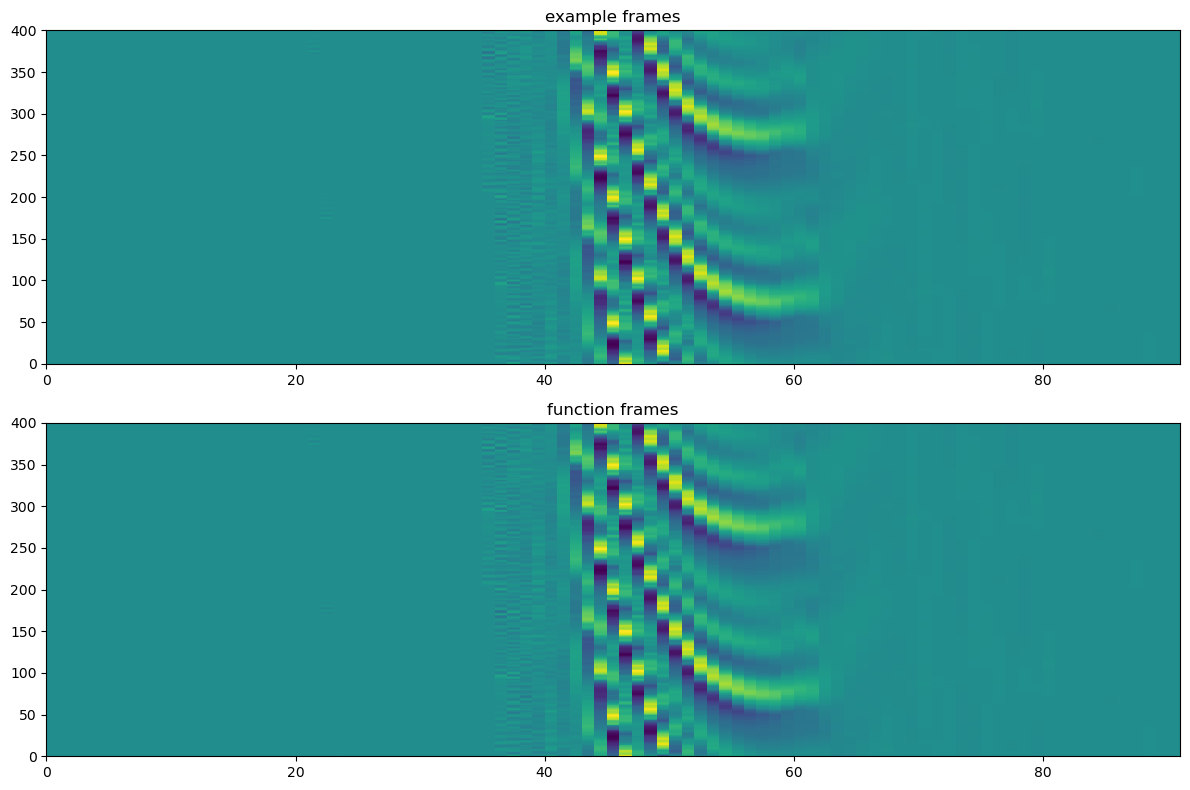

In [49]:

print(example["frames"].shape)


def enframe(samples, winlen, winshift, samplingrate=20000):
    winlen_samples = int(winlen * samplingrate)
    winshift_samples = int(winshift*samplingrate)
    n_f = int((len(samples) - winlen_samples) / winshift_samples) + 1
    frames = np.zeros((n_f, winlen_samples))
    for i in range(n_f):
        start = i * winshift_samples
        end = start + winlen_samples
        frames[i, :] = samples[start:end]
    return frames

# Test  be careful of the time --------------------------------------------------------------------------------------------------
winlen = 0.02
winshift = 0.01
outcome = enframe(example["samples"],winlen, winshift)
plot_comparison(example["frames"].T, outcome.T, "example frames", "function frames")

# 4.2 Pre-emphasis

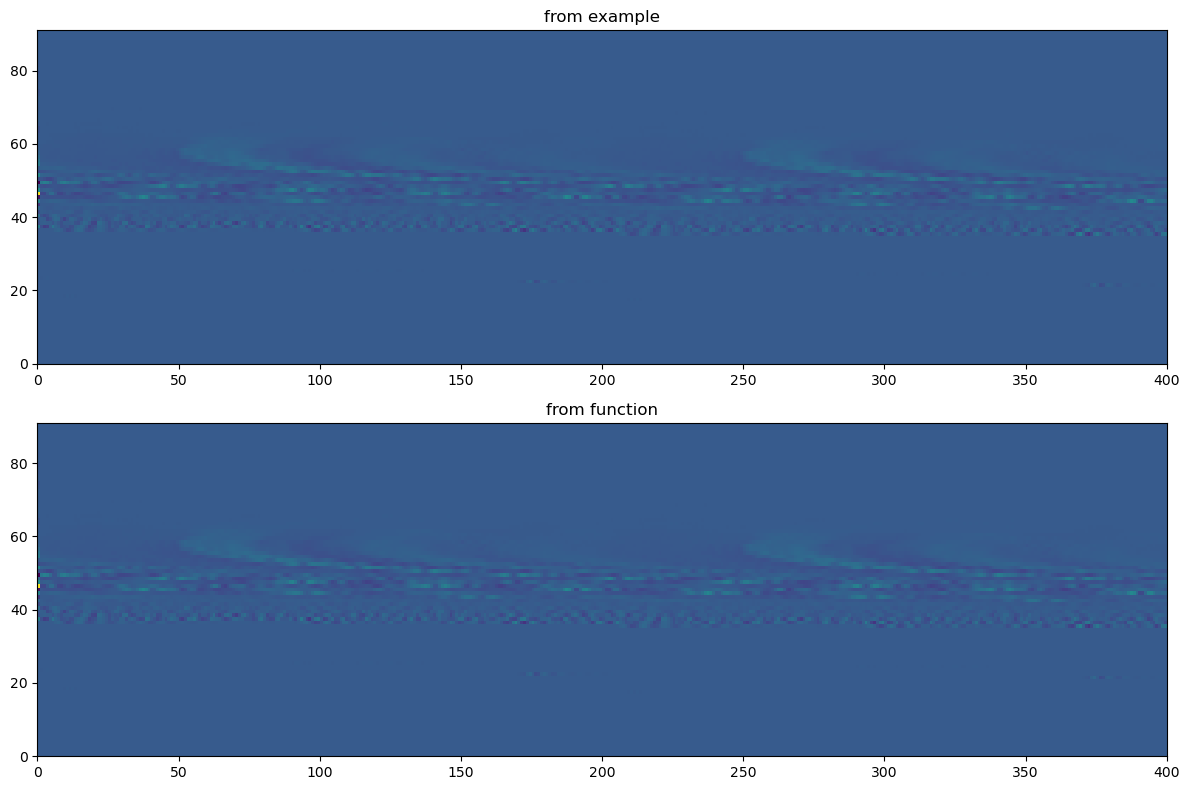

In [ ]:
from scipy.signal import lfilter
def preemp(input, p=0.97):
    b = [1, -p]
    a = [1] 
    output = np.zeros_like(input)
    for i in range(input.shape[0]):
        output[i] = lfilter(b, a, input[i])
    return output

outcome_peep = preemp(outcome)

# Test  
plot_comparison(example["preemph"].T,outcome_peep.T)

# 4.3 Hamming Window

C:\Users\25954\AppData\Local\Temp\ipykernel_11608\2148265749.py:4: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  wind = hamming(M, sym=False)


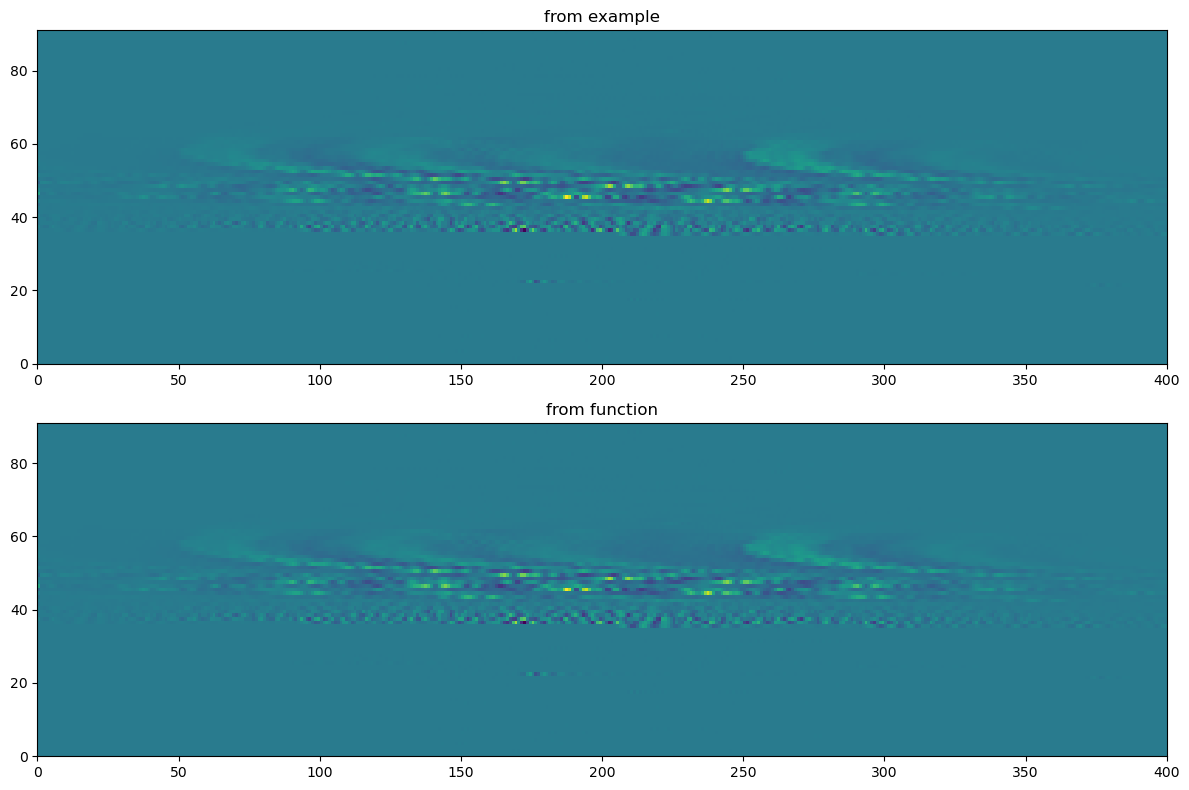

In [ ]:
from scipy.signal import hamming
def windowing(input):
    _, M = input.shape
    wind = hamming(M, sym=False)
    return input * wind

outcome_window = windowing(outcome_peep)

# Test
plot_comparison(example["windowed"].T,outcome_window.T)

# 4.4 Fast Fourier Transform

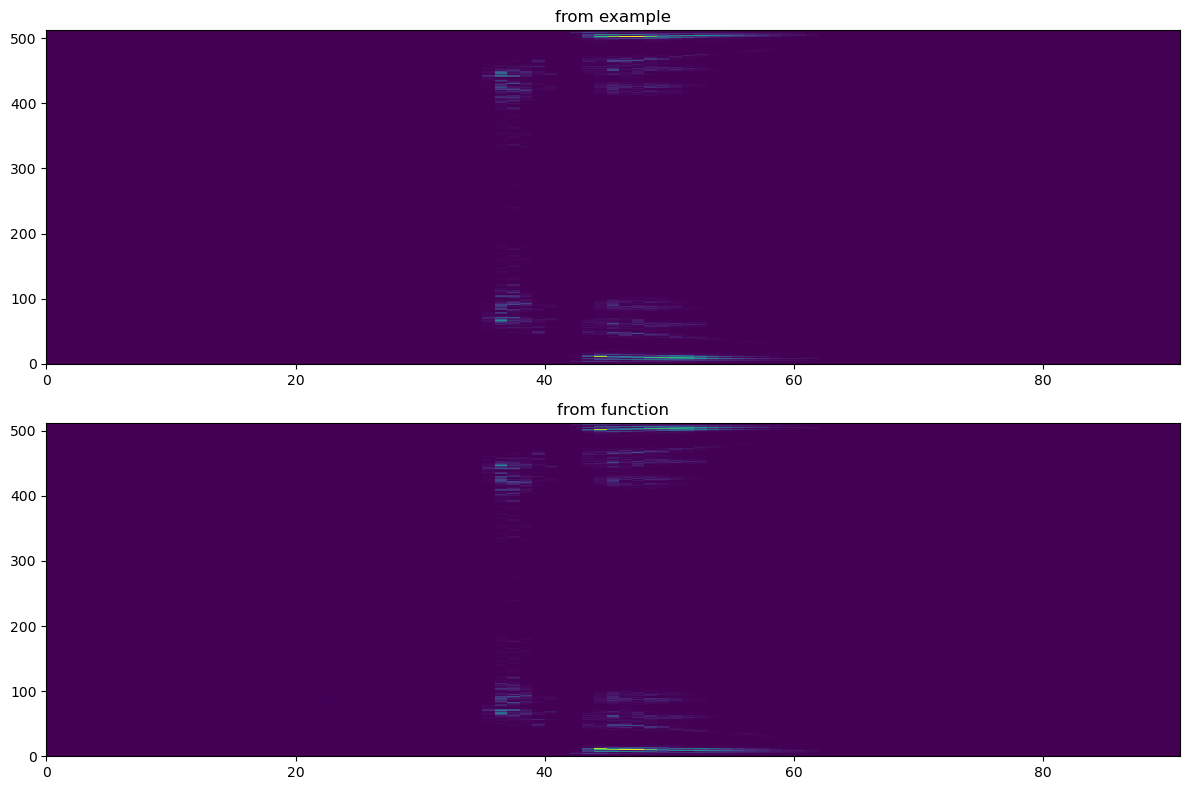

10000.0

In [54]:
from scipy.fftpack import fft
def powerSpectrum(input, nfft):
    fft_input = fft(input,nfft)
    power_spec = np.abs(fft_input)**2
    return power_spec

# Test
nfft = 512
outcome_ps = powerSpectrum(outcome_window, nfft)
plot_comparison(example["spec"].T,outcome_ps.T)

example["samplingrate"]/2

# 4.5 Mel filterbank log spectrum

In [61]:
example["mspec"].shape
from lab1_tools import trfbank
def logMelSpectrum(input, samplingrate):
    n_frames, nfft = input.shape
    fbank = trfbank(samplingrate, nfft)
    mel_spec = np.dot(input, fbank.T)
    log_mel = np.log(mel_spec)
    return log_mel

outcome_logmel = logMelSpectrum(outcome_ps,example["samplingrate"])
outcome_logmel.shape

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations